In [3]:
import torch 
import torch.nn as nn 
import torchvision 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 

In [17]:
#device config 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 784 
hidden_size = 100 
num_classes = 10
epochs = 4
batch_size = 100 
learning_rate = 0.001

In [5]:
import torch.utils
import torch.utils.data


train_dataset = torchvision.datasets.MNIST(root='./data', train = True , transform=transforms.ToTensor() , download= True)
test_dataset = torchvision.datasets.MNIST(root='./data', train = False , transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset= train_dataset ,batch_size = batch_size, shuffle= True )
test_loader = torch.utils.data.DataLoader(dataset= test_dataset , batch_size= batch_size, shuffle= False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:17<00:00, 575718.09it/s] 


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 108589.09it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:02<00:00, 699915.26it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3925515.92it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [18]:
example = iter(train_loader)
samples , labels = next(example)
print(samples.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


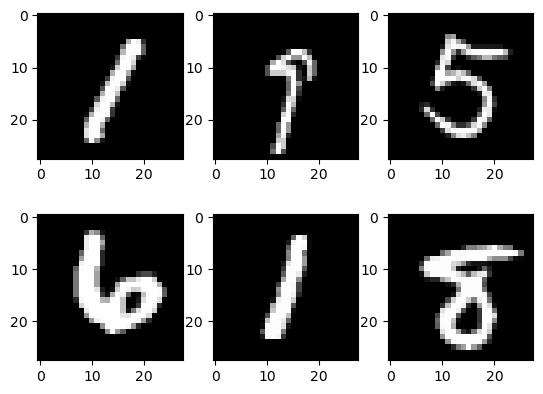

In [19]:
for i in range(6):
    plt.subplot(2 ,3 , i+1)
    plt.imshow(samples[i][0] , cmap= 'gray')

In [20]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [21]:
model = NeuralNetwork(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/600], Loss: {loss.item():.4f}')
    

Epoch [1/4], Step [100/600], Loss: 0.4764
Epoch [1/4], Step [200/600], Loss: 0.2787
Epoch [1/4], Step [300/600], Loss: 0.2904
Epoch [1/4], Step [400/600], Loss: 0.3480
Epoch [1/4], Step [500/600], Loss: 0.1402
Epoch [1/4], Step [600/600], Loss: 0.3154
Epoch [2/4], Step [100/600], Loss: 0.1636
Epoch [2/4], Step [200/600], Loss: 0.1358
Epoch [2/4], Step [300/600], Loss: 0.1088
Epoch [2/4], Step [400/600], Loss: 0.1247
Epoch [2/4], Step [500/600], Loss: 0.2126
Epoch [2/4], Step [600/600], Loss: 0.2463
Epoch [3/4], Step [100/600], Loss: 0.0903
Epoch [3/4], Step [200/600], Loss: 0.1788
Epoch [3/4], Step [300/600], Loss: 0.1335
Epoch [3/4], Step [400/600], Loss: 0.1088
Epoch [3/4], Step [500/600], Loss: 0.1129
Epoch [3/4], Step [600/600], Loss: 0.1522
Epoch [4/4], Step [100/600], Loss: 0.0445
Epoch [4/4], Step [200/600], Loss: 0.1552
Epoch [4/4], Step [300/600], Loss: 0.1212
Epoch [4/4], Step [400/600], Loss: 0.1210
Epoch [4/4], Step [500/600], Loss: 0.1233
Epoch [4/4], Step [600/600], Loss:

In [22]:

num_classes = 10

# Initialize the model, loss function, and optimizer
model = NeuralNetwork(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # If necessary, adjust the labels to be in the range [0, num_classes-1]
        if labels.min() < 0 or labels.max() >= num_classes:
            raise ValueError(f"Label value out of range: {labels.min()} to {labels.max()}")

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/600], Loss: {loss.item():.4f}')


Epoch [1/4], Step [100/600], Loss: 0.3820
Epoch [1/4], Step [200/600], Loss: 0.2918
Epoch [1/4], Step [300/600], Loss: 0.2557
Epoch [1/4], Step [400/600], Loss: 0.1874
Epoch [1/4], Step [500/600], Loss: 0.1495
Epoch [1/4], Step [600/600], Loss: 0.2956
Epoch [2/4], Step [100/600], Loss: 0.3425
Epoch [2/4], Step [200/600], Loss: 0.1645
Epoch [2/4], Step [300/600], Loss: 0.2636
Epoch [2/4], Step [400/600], Loss: 0.2361
Epoch [2/4], Step [500/600], Loss: 0.0929
Epoch [2/4], Step [600/600], Loss: 0.1994
Epoch [3/4], Step [100/600], Loss: 0.1027
Epoch [3/4], Step [200/600], Loss: 0.1307
Epoch [3/4], Step [300/600], Loss: 0.0976
Epoch [3/4], Step [400/600], Loss: 0.1565
Epoch [3/4], Step [500/600], Loss: 0.2100
Epoch [3/4], Step [600/600], Loss: 0.1736
Epoch [4/4], Step [100/600], Loss: 0.1661
Epoch [4/4], Step [200/600], Loss: 0.1185
Epoch [4/4], Step [300/600], Loss: 0.1231
Epoch [4/4], Step [400/600], Loss: 0.1306
Epoch [4/4], Step [500/600], Loss: 0.1587
Epoch [4/4], Step [600/600], Loss:

In [23]:
with torch.no_grad():
    n_correct = 0 
    n_sample = 0
    for images , labels in test_loader:
        images = images.reshape(-1 , 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, pred = torch.max(outputs , 1)
        n_sample += labels.shape[0]
        n_correct = (pred == labels).sum().item()

    acc = 100.0 *n_correct/n_sample 
    print(acc)

0.96
